<a href="https://colab.research.google.com/github/aunz/Insight-Data-Science-Challenge/blob/master/NYC_Restaurant_Inspections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NYC Restaurant Inspection

In [2]:
!curl -o data.zip https://raw.githubusercontent.com/aunz/Insight-Data-Science-Challenge/master/data_w6_NYC_restaurant_inspections.zip
!unzip -qq data.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22.2M  100 22.2M    0     0  23.9M      0 --:--:-- --:--:-- --:--:-- 23.8M


In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [4]:
data = pd.concat([pd.read_csv(f'DOHMH_New_York_City_Restaurant_Inspection_Results_{i}_of_6.txt') for i in range(1, 7)], 0)
data = data.iloc[:,1:]
print(data.shape)
print(data.info())
print(data.nunique())
data.head()

(399918, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 399918 entries, 0 to 66652
Data columns (total 18 columns):
CAMIS                    399918 non-null int64
DBA                      399559 non-null object
BORO                     399918 non-null object
BUILDING                 399809 non-null object
STREET                   399909 non-null object
ZIPCODE                  399909 non-null float64
PHONE                    399913 non-null object
CUISINE DESCRIPTION      399918 non-null object
INSPECTION DATE          399918 non-null object
ACTION                   398783 non-null object
VIOLATION CODE           393414 non-null object
VIOLATION DESCRIPTION    392939 non-null object
CRITICAL FLAG            399918 non-null object
SCORE                    376704 non-null float64
GRADE                    195413 non-null object
GRADE DATE               192820 non-null object
RECORD DATE              399918 non-null object
INSPECTION TYPE          398783 non-null object
dtypes: floa

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection


## CAMIS & DBA

CAMIS: Unique identifier for the entity (restaurant): N unique = 26505
DBA: Name (doing business as) of the entity (restaurant). N unique = 20936


In [5]:
data['CAMIS'].nunique(), data['DBA'].nunique()

(26505, 20936)

In [6]:
print(data['CAMIS'].value_counts()[:10])
print(data['DBA'].value_counts()[:10])

41683816    97
50001880    95
40965177    94
50033122    91
41510846    90
41459659    90
41289382    88
41630632    86
41528486    79
40392685    78
Name: CAMIS, dtype: int64
DUNKIN' DONUTS                    4296
SUBWAY                            3793
MCDONALD'S                        2801
STARBUCKS                         2151
DUNKIN' DONUTS, BASKIN ROBBINS    1474
DOMINO'S                          1422
CROWN FRIED CHICKEN               1189
KENNEDY FRIED CHICKEN             1139
BURGER KING                       1080
CHIPOTLE MEXICAN GRILL             969
Name: DBA, dtype: int64


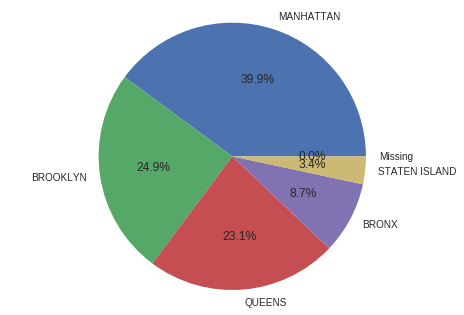

In [7]:
tmp = data['BORO'].value_counts(dropna = False)

# _, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect='equal'))

# wedges, texts = ax.pie(tmp.values, wedgeprops=dict(width=0.5), startangle=-40, autopct='%1.1f%%')

# bbox_props = dict(boxstyle='square,pad=0.3', fc='w', ec='k', lw=0.72)
# kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle='-'),
#           bbox=bbox_props, zorder=0, va='center')

# for i, p in enumerate(wedges):
#     ang = (p.theta2 - p.theta1)/2. + p.theta1
#     y = np.sin(np.deg2rad(ang))
#     x = np.cos(np.deg2rad(ang))
#     horizontalalignment = {-1: 'right', 1: 'left'}[int(np.sign(x))]
#     connectionstyle = 'angle,angleA=0,angleB={}'.format(ang)
#     kw['arrowprops'].update({'connectionstyle': connectionstyle})
#     ax.annotate(tmp.index[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
#                  horizontalalignment=horizontalalignment, **kw)


# _, ax = plt.subplots()
plt.pie(tmp.values, labels=tmp.index, autopct='%1.1f%%')
plt.axis('equal');

## CUISINE DESCRIPTION

In [9]:
data['CUISINE DESCRIPTION'].value_counts()[:10]

American                                                            90968
Chinese                                                             42321
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    19135
Pizza                                                               18754
Italian                                                             17732
CafÃ©/Coffee/Tea                                                    15568
Mexican                                                             15217
Japanese                                                            14491
Caribbean                                                           13021
Bakery                                                              11948
Name: CUISINE DESCRIPTION, dtype: int64

## Date

In [0]:
data['INSPECTION DATE'] = pd.to_datetime(data['INSPECTION DATE'], format='%m/%d/%Y')
data['RECORD DATE'] = pd.to_datetime(data['RECORD DATE'], format='%m/%d/%Y')
data['DELTA DATE'] = (data['RECORD DATE'] - data['INSPECTION DATE']).dt.days

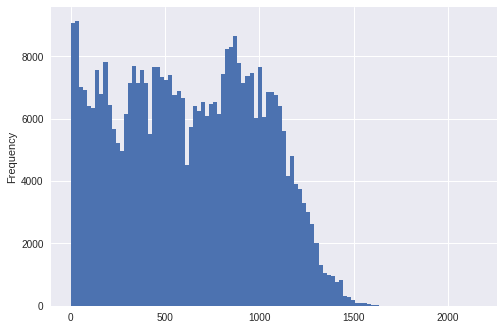

In [11]:
data['DELTA DATE'][data['DELTA DATE'] < 10000].plot.hist(100);

## Action & Grade & Critical Flag

In [12]:
data['ACTION'].value_counts(dropna = False)

Violations were cited in the following area(s).                                                                                        380632
Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.      9240
No violations were recorded at the time of this inspection.                                                                              5373
Establishment re-opened by DOHMH                                                                                                         2713
NaN                                                                                                                                      1135
Establishment re-closed by DOHMH                                                                                                          825
Name: ACTION, dtype: int64

In [13]:
data['CRITICAL FLAG'].value_counts(dropna = False)

Critical          220082
Not Critical      172857
Not Applicable      6979
Name: CRITICAL FLAG, dtype: int64

In [14]:
data['GRADE'].value_counts(dropna = False)

NaN               204505
A                 154194
B                  28166
C                   6992
Not Yet Graded      2598
Z                   2104
P                   1359
Name: GRADE, dtype: int64

In [15]:
tmp = pd.crosstab(data['BORO'], data['CRITICAL FLAG']).loc[:, ['Not Applicable', 'Not Critical', 'Critical']]
tmp = tmp[tmp.index != 'Missing']
# tmp.[:,['Critical']]
# print(tmp)
tmp = pd.concat([tmp, tmp.apply(lambda x: np.round(x / tmp.sum(1) * 100, 1), 0)], 1)
tmp

CRITICAL FLAG,Not Applicable,Not Critical,Critical,Not Applicable,Not Critical,Critical
BORO,,,,,,
BRONX,575,15293,19027,1.6,43.8,54.5
BROOKLYN,1968,43600,54030,2.0,43.8,54.2
MANHATTAN,2672,68406,88496,1.7,42.9,55.5
QUEENS,1560,39910,50945,1.7,43.2,55.1
STATEN ISLAND,195,5648,7584,1.5,42.1,56.5


In [0]:
# tmp = pd.crosstab(data['CUISINE DESCRIPTION'], data['CRITICAL FLAG']).loc[:, ['Not Applicable', 'Not Critical', 'Critical']]
# tmp = tmp[tmp.index != 'Missing']
# print(tmp)
# tmp.apply(lambda x: np.round(x / tmp.sum(1) * 100, 1), 0)

In [17]:
tmp = data[data['CUISINE DESCRIPTION'].isin(data['CUISINE DESCRIPTION'].value_counts()[:20].index)]
tmp = pd.crosstab(tmp['CUISINE DESCRIPTION'], tmp['CRITICAL FLAG']).loc[:, ['Not Applicable', 'Not Critical', 'Critical']]
tmp = pd.concat([tmp, tmp.apply(lambda x: np.round(x / tmp.sum(1) * 100, 1), 0)], 1)
tmp

CRITICAL FLAG,Not Applicable,Not Critical,Critical,Not Applicable,Not Critical,Critical
CUISINE DESCRIPTION,,,,,,
American,1461,40481,49026,1.6,44.5,53.9
Asian,100,2469,3686,1.6,39.5,58.9
Bakery,255,4923,6770,2.1,41.2,56.7
CafÃ©/Coffee/Tea,313,7470,7785,2.0,48.0,50.0
Caribbean,195,5782,7044,1.5,44.4,54.1
Chicken,91,2862,3129,1.5,47.1,51.4
Chinese,536,16918,24867,1.3,40.0,58.8
Delicatessen,81,2498,3624,1.3,40.3,58.4
Donuts,63,2790,2761,1.1,49.7,49.2


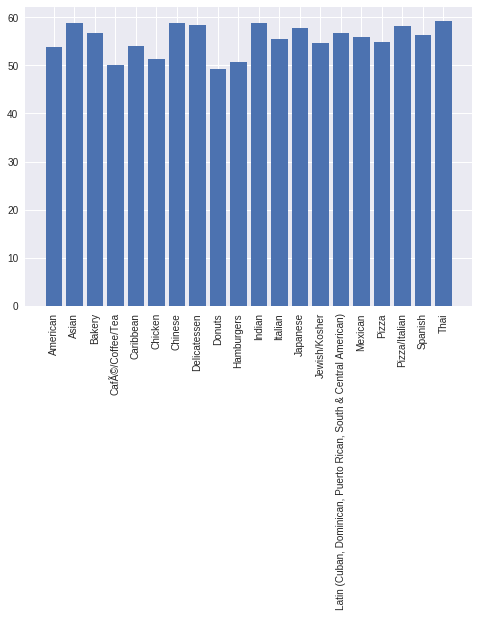

In [0]:

plt.bar(range(len(tmp.index)), tmp.iloc[:,-1])
plt.xticks(range(len(tmp.index)), tmp.index, rotation=90);